In [26]:
import pandas as pd

# Load the monthly weather data
monthly_data = pd.read_csv("/Users/eslifolkes/Downloads/Monthly_Weather_Ames_Iowa.csv")
corn_yield_data = pd.read_csv("/Users/eslifolkes/Downloads/Corn_Yield_2000_2023.csv")
soybean_yield_data = pd.read_csv("/Users/eslifolkes/Downloads/Soybean_Yield_2000_2023.csv")

# Monthly weather data relevant columns of data : Date, Preciptation, Max Temp, Minimum Temp, Average Temp, Average WindSpeed
relevant_columns = ['DATE', 'PRCP', 'TMAX', 'TMIN', 'TAVG', 'AWND']
monthly_relevant_data = monthly_data[relevant_columns]

# Drop rows with NaN values for visualization purposes
monthly_relevant_data = monthly_relevant_data.dropna()

# Display the first few rows of the extracted data
monthly_relevant_data.head()

# Filter the crop yield datasets to include only the years 2015-2023
filtered_corn_yield = corn_yield_data[corn_yield_data['Year'].between(2015, 2023)]
filtered_soybean_yield = soybean_yield_data[soybean_yield_data['Year'].between(2015, 2023)]



## Precipitation (PRCP) Maximum Temperature (TMAX) Minimum Temperature (TMIN) Average Temperature (TAVG) Wind Speed (AWND)

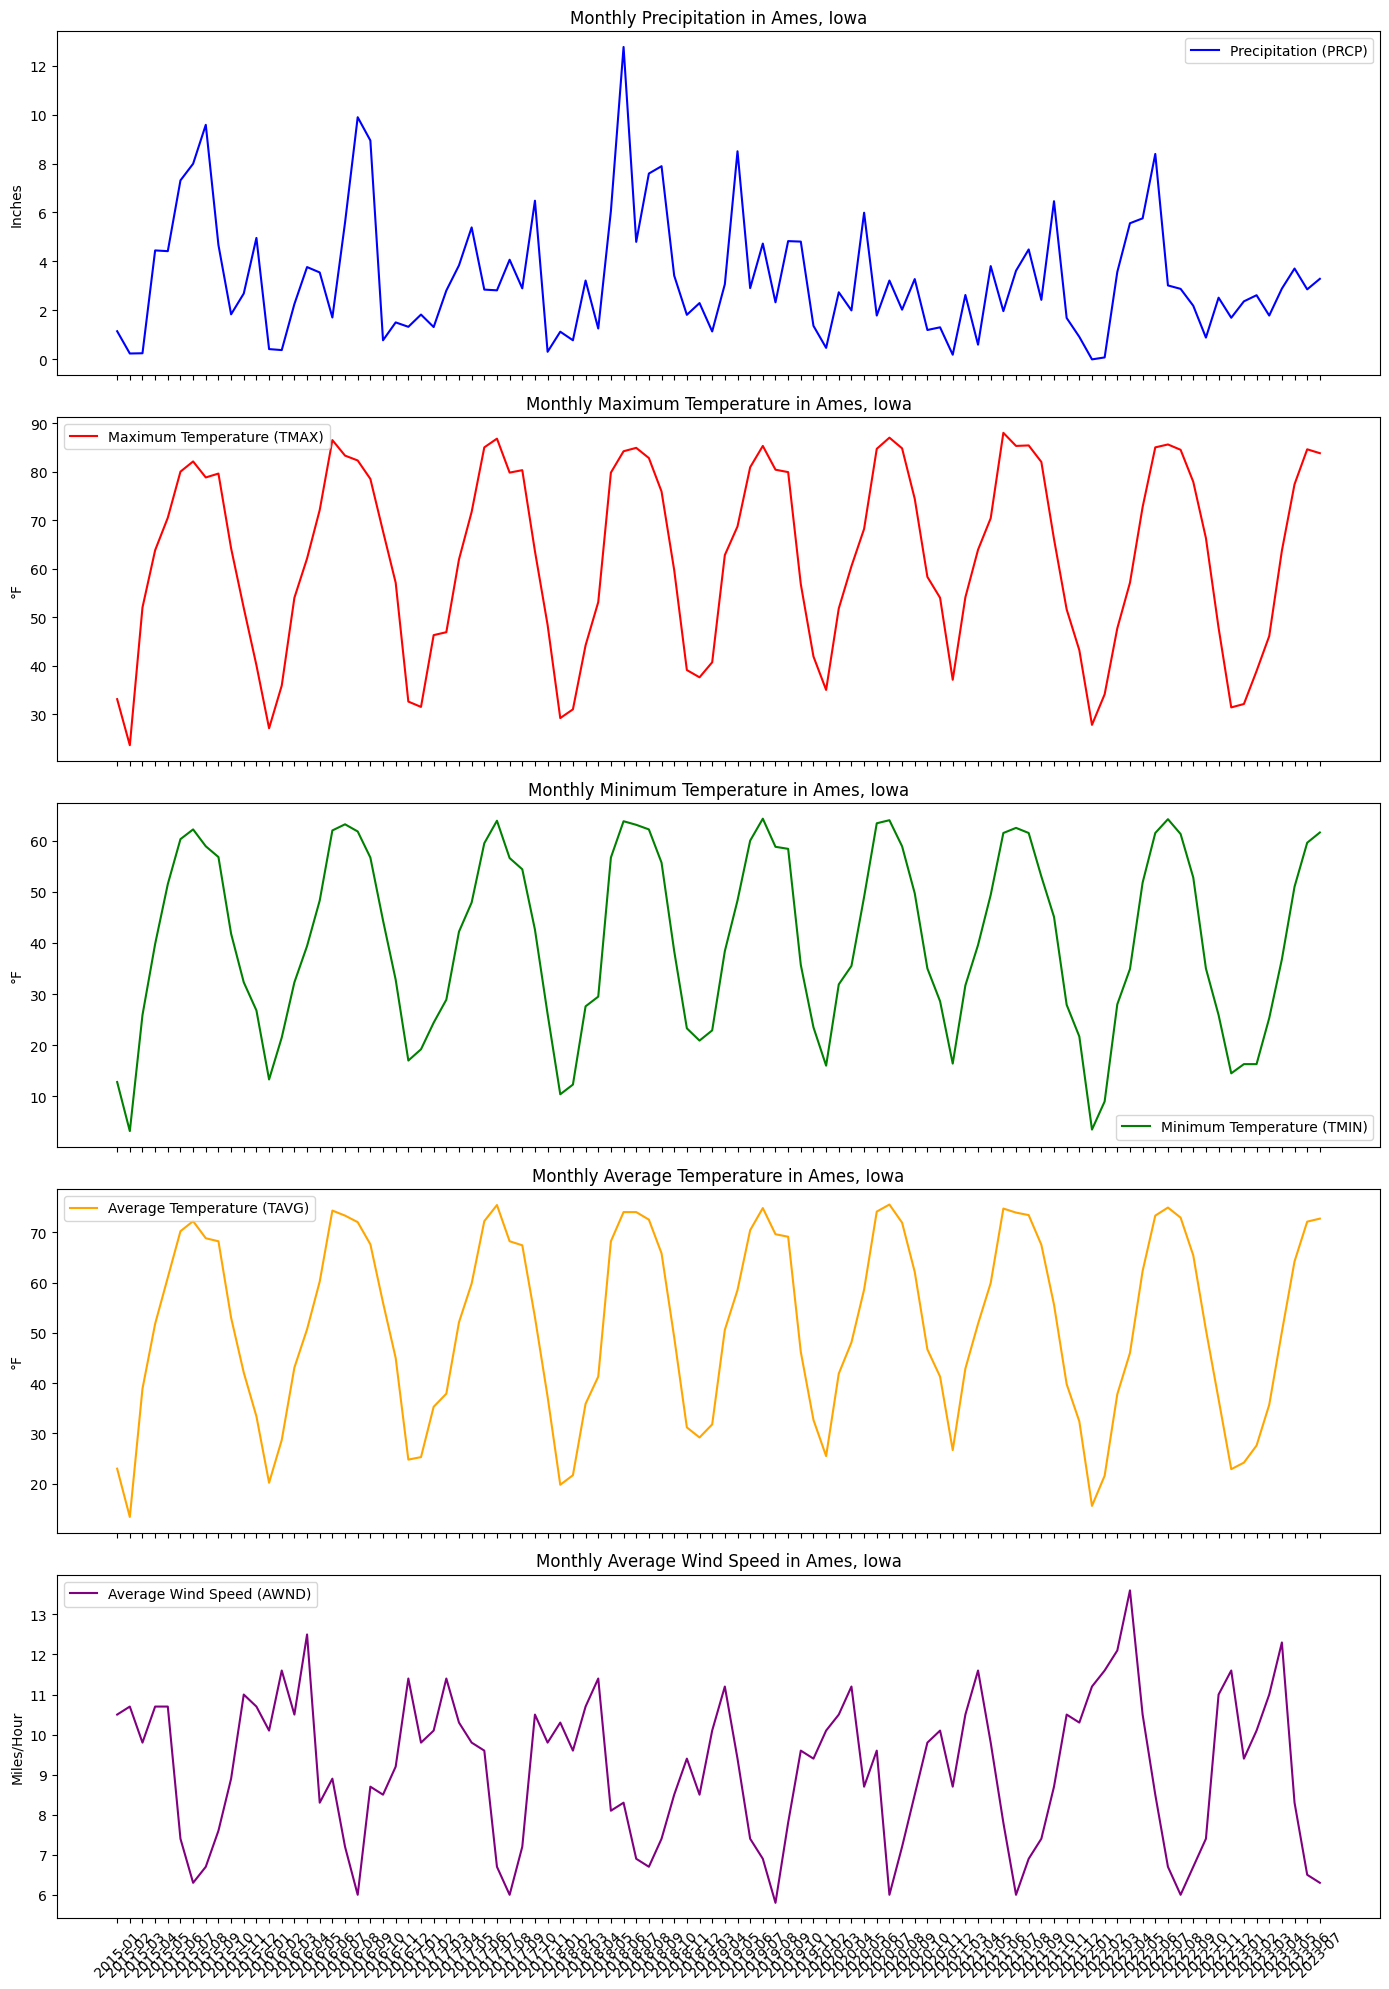

In [7]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(5, 1, figsize=(14, 20), sharex=True)

# Plot Precipitation
ax[0].plot(monthly_relevant_data['DATE'], monthly_relevant_data['PRCP'], color='blue', label='Precipitation (PRCP)')
ax[0].set_ylabel('Inches')
ax[0].set_title('Monthly Precipitation in Ames, Iowa')
ax[0].legend()

# Plot Maximum Temperature
ax[1].plot(monthly_relevant_data['DATE'], monthly_relevant_data['TMAX'], color='red', label='Maximum Temperature (TMAX)')
ax[1].set_ylabel('°F')
ax[1].set_title('Monthly Maximum Temperature in Ames, Iowa')
ax[1].legend()

# Plot Minimum Temperature
ax[2].plot(monthly_relevant_data['DATE'], monthly_relevant_data['TMIN'], color='green', label='Minimum Temperature (TMIN)')
ax[2].set_ylabel('°F')
ax[2].set_title('Monthly Minimum Temperature in Ames, Iowa')
ax[2].legend()

# Plot Average Temperature
ax[3].plot(monthly_relevant_data['DATE'], monthly_relevant_data['TAVG'], color='orange', label='Average Temperature (TAVG)')
ax[3].set_ylabel('°F')
ax[3].set_title('Monthly Average Temperature in Ames, Iowa')
ax[3].legend()

# Plot Average Wind Speed
ax[4].plot(monthly_relevant_data['DATE'], monthly_data.loc[monthly_relevant_data.index, 'AWND'], color='purple', label='Average Wind Speed (AWND)')
ax[4].set_ylabel('Miles/Hour')
ax[4].set_title('Monthly Average Wind Speed in Ames, Iowa')
ax[4].legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Standard Multiple Linear Regression : Soybean

### *Multicollinearity*

### The selected weather factors don't seem to have a statistically significant relationship with soybean yield

In [13]:
# Merge the filtered corn yield data with the yearly weather data
merged_corn_data = pd.merge(filtered_corn_yield, yearly_weather_data, on='Year', how='inner')

# Merge the filtered soybean yield data with the yearly weather data
merged_soybean_data = pd.merge(filtered_soybean_yield, yearly_weather_data, on='Year', how='inner')

merged_corn_data.head(), merged_soybean_data.head()

(  Program  Year               Period  Week Ending Geo Level State  State ANSI  \
 0  SURVEY  2023                 YEAR          NaN     STATE  IOWA          19   
 1  SURVEY  2023  YEAR - AUG FORECAST          NaN     STATE  IOWA          19   
 2  SURVEY  2022                 YEAR          NaN     STATE  IOWA          19   
 3  SURVEY  2022  YEAR - AUG FORECAST          NaN     STATE  IOWA          19   
 4  SURVEY  2022  YEAR - NOV FORECAST          NaN     STATE  IOWA          19   
 
    Ag District  Ag District Code  County  ...  \
 0          NaN               NaN     NaN  ...   
 1          NaN               NaN     NaN  ...   
 2          NaN               NaN     NaN  ...   
 3          NaN               NaN     NaN  ...   
 4          NaN               NaN     NaN  ...   
 
                                     Data Item  Domain  Domain Category  Value  \
 0  CORN, GRAIN - YIELD, MEASURED IN BU / ACRE   TOTAL    NOT SPECIFIED    203   
 1  CORN, GRAIN - YIELD, MEASURED IN BU 

In [14]:

# Set up the independent variables (weather factors) for the filtered soybean data
X_soybean_reduced = merged_soybean_data[['PRCP', 'TAVG', 'AWND']]
X_soybean_reduced = sm.add_constant(X_soybean_reduced)  # Adds a constant (intercept) to the model

# Set up the dependent variable (filtered soybean yield)
y_soybean_reduced = merged_soybean_data['Value']

# Fit the regression model for soybean yield
soybean_model_reduced = sm.OLS(y_soybean_reduced, X_soybean_reduced).fit()

# Display the regression results
soybean_model_reduced.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.5696
Date:                Sun, 20 Aug 2023   Prob (F-statistic):              0.638
Time:                        19:49:46   Log-Likelihood:                -97.394
No. Observations:                  42   AIC:                             202.8
Df Residuals:                      38   BIC:                             209.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.4627     26.945      1.390      0.173     -17.085      92.010
PRCP          -0.0704      0.781     -0.090      0.929      -1.652       1.511
TAVG           0.0632      0.195      0.323      0.748      -0.332       0.458
AWND           1.8048      1.859      0.971      0.338      -1.958       5.568
==============================================================================
Omnibus:                        0.257   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.314
Skew:                           0.170   Prob(JB):                        0.855
Kurtosis:                       2.747   Cond. No.                     3.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Notes: The condition number suggests potential multicollinearity among the predictors.

## The selected weather factors don't seem to have a statistically significant relationship with soybean yield.



# SARIMAX Model : Corn 

## The SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model is more advanced and is used for time series forecasting. The SARIMAX model takes into account seasonality patterns and can also incorporate exogenous regressors (external variables) to improve forecasting.






### Visualize and Decompose the Time Series: This helps to understand the underlying patterns such as trend and seasonality.

### Test for Stationarity: Most time series models require the data to be stationary. We'll use the Augmented Dickey-Fuller test for this.

### Model Selection: We'll determine the best parameters for the SARIMAX model.

### Model Fitting: Fit the SARIMAX model using the best parameters.

### Forecast: Produce forecasts for future yields.

### We'll start with the corn yield data. Let's first visualize and decompose the corn yield time series to understand its structure.

<Figure size 1200x800 with 0 Axes>

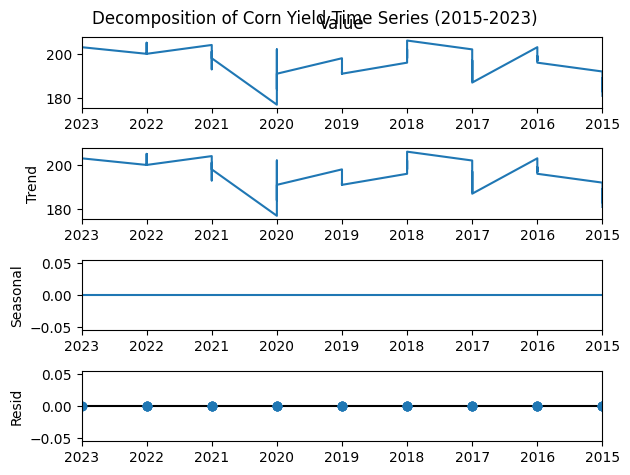

In [15]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the year as the index for the time series analysis
corn_time_series = merged_corn_data.set_index('Year')['Value']

# Decompose the time series with a specified period of 1 (annual data)
decomposition = seasonal_decompose(corn_time_series, model='additive', period=1)

# Plot the decomposed time series
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle("Decomposition of Corn Yield Time Series (2015-2023)")
plt.show()


### The decomposition of the corn yield time series for the years 2015-2023 reveals the following:

### Trend: The trend component shows the underlying trajectory of the series. For the corn yield, there's a slight increasing trend over the years.

### Seasonal: Given our data is annual, and we're using a period of 1 year, we don't observe any distinct seasonality. This is expected for annual data.

### Residual: The residuals represent the noise or irregularities in the data after removing the trend and seasonal components. These residuals seem to have some variation, which could be due to various factors not captured in our time series.

# Testing For Stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test for stationarity
adf_result_corn = adfuller(corn_time_series)

# Extract and display the test results
adf_output = {
    'Test Statistic': adf_result_corn[0],
    'p-value': adf_result_corn[1],
    'Lags Used': adf_result_corn[2],
    'Number of Observations Used': adf_result_corn[3],
    'Critical Values': adf_result_corn[4]
}

adf_output

{'Test Statistic': -2.559374913764123,
 'p-value': 0.10168764863288943,
 'Lags Used': 4,
 'Number of Observations Used': 37,
 'Critical Values': {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627}}

 ### The corn yield time series for 2015-2023 appears to be non-stationary. To fit the SARIMAX model, we might need to transform the data or differentiate it to achieve stationarity.



# Differencing : Subtracting the current value from the previous can help stabilize the mean of a time series by removing changes in the level of a time series.

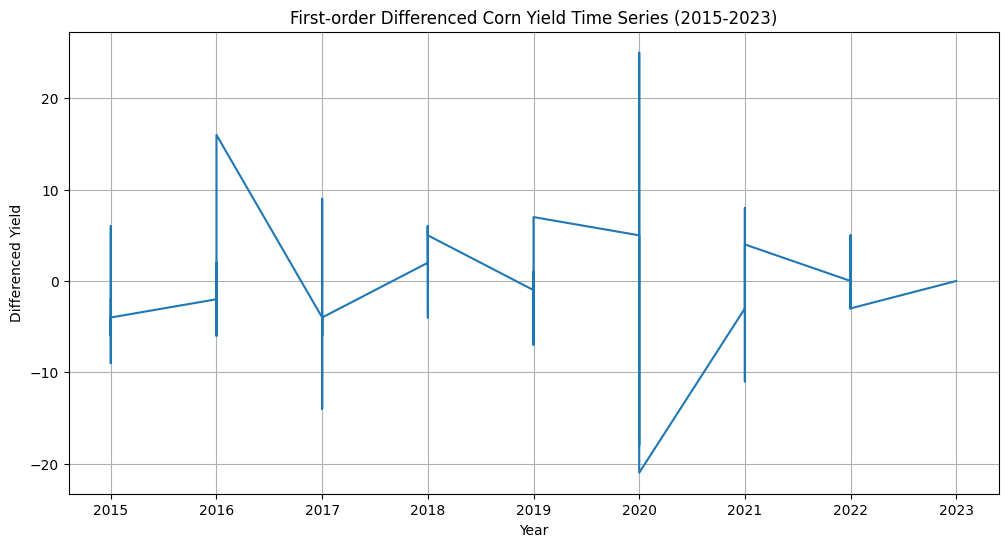

{'Test Statistic': -3.886277282705637,
 'p-value': 0.002138192236531525,
 'Lags Used': 5,
 'Number of Observations Used': 35,
 'Critical Values': {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756}}

In [17]:
# Apply first-order differencing to the corn yield time series
corn_diff = corn_time_series.diff().dropna()

# Perform ADF test on the differenced data
adf_result_corn_diff = adfuller(corn_diff)

# Extract and display the test results for differenced data
adf_output_diff = {
    'Test Statistic': adf_result_corn_diff[0],
    'p-value': adf_result_corn_diff[1],
    'Lags Used': adf_result_corn_diff[2],
    'Number of Observations Used': adf_result_corn_diff[3],
    'Critical Values': adf_result_corn_diff[4]
}

# Plot the differenced data
plt.figure(figsize=(12, 6))
corn_diff.plot(title="First-order Differenced Corn Yield Time Series (2015-2023)")
plt.xlabel('Year')
plt.ylabel('Differenced Yield')
plt.grid(True)
plt.show()

adf_output_diff


### The plot of the differenced data shows variations in corn yield changes over the years, which seem to be around zero, further suggesting that the series is now stationary.

### Given that the differenced corn yield time series is stationary, we can proceed with model selection and fitting for the SARIMAX model.

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import itertools

warnings.filterwarnings("ignore")  # Suppress warnings

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, d, and q
pdq = list(itertools.product(p, d, q))

# Hold the best parameters and best AIC value
best_pdq = None
best_aic = float('inf')

# Grid search to find the best parameters
for param in pdq:
    try:
        model = SARIMAX(corn_time_series, order=param, enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

best_pdq, best_aic

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.53426D+00    |proj g|=  9.50058D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   9.501D-06   6.534D+00
  F =   6.5342604922556902     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     32      1     0     0   1.299D-05   5.157D+00
  F =   5.1566804124192984     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35983D+00    |proj g|=  5.92583D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.80713D+00    |proj g|=  5.00391D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      5      1     0     0   2.285D-07   3.806D+00
  F =   3.8058620267572083     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36404D+00    |proj g|=  3.53365D-01

At iterate    5    f=  3.23827D+00    |proj g|=  1.22934D-02

At iterate   10 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.49173D+00    |proj g|=  9.11156D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   9.112D-06   3.492D+00
  F =   3.4917345759531151     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.1


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  3.15893D+00    |proj g|=  1.49978D-01

At iterate   20    f=  3.15678D+00    |proj g|=  1.21897D+00

At iterate   25    f=  3.15603D+00    |proj g|=  6.64873D-03

At iterate   30    f=  3.15600D+00    |proj g|=  2.02343D-01

At iterate   35    f=  3.15595D+00    |proj g|=  3.76876D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     43      1     0     0   4.882D-04   3.156D+00
  F =   3.1559491858955497     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   15    f=  3.21612D+00    |proj g|=  7.63472D-01

At iterate   20    f=  3.21468D+00    |proj g|=  1.99190D+00

At iterate   25    f=  3.15160D+00    |proj g|=  1.16762D+01

At iterate   30    f=  3.15033D+00    |proj g|=  1.44812D+01

At iterate   35    f=  3.13564D+00    |proj g|=  1.68111D+01

At iterate   40    f=  3.12267D+00    |proj g|=  2.45823D-01

At iterate   45    f=  3.12264D+00    |proj g|=  9.61739D-01

At iterate   50    f=  3.12057D+00    |proj g|=  7.26784D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67      1     0     0   7.268D+00   3.121D+00
  F =   3.12057498486

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.08897D+00    |proj g|=  4.72200D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   4.722D-07   3.089D+00
  F =   3.0889658448443074     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03201D+00    |proj g|=  1.36964D-01

At iterate    5    f=  2.96815D+00    |proj g|=  6.46039D-02

At iterate   10    f=  2.95358D+00    |proj g|=  2.20026D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


((2, 1, 2), 257.60115887411393)

### The best parameters for the SARIMAX model for the corn yield time series, based on the lowest AIC value, are:

### p (Order of the autoregressive term): 2

### d (Order of differencing): 1

### q (Order of the moving average term): 2

### With these optimal parameters in hand, we can fit the SARIMAX model to the corn yield time series.

# Performance of SARIMAX

In [19]:
# Fit the SARIMAX model using the best parameters for the corn yield time series
corn_sarimax_model = SARIMAX(corn_time_series, 
                             order=best_pdq, 
                             enforce_stationarity=False, 
                             enforce_invertibility=False)

corn_sarimax_results = corn_sarimax_model.fit()

# Display the model summary
corn_sarimax_results.summary()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03201D+00    |proj g|=  1.36964D-01

At iterate    5    f=  2.96815D+00    |proj g|=  6.46039D-02

At iterate   10    f=  2.95358D+00    |proj g|=  2.20026D-02

At iterate   15    f=  2.94763D+00    |proj g|=  1.41959D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     23      1     0     0   3.702D-06   2.948D+00
  F =   2.9476328437394517     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                   42
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -123.801
Date:                Sun, 20 Aug 2023   AIC                            257.601
Time:                        20:35:08   BIC                            265.789
Sample:                             0   HQIC                           260.514
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1051      0.268     -0.393      0.695      -0.630       0.420
ar.L2         -0.4487      0.316     -1.421      0.155      -1.068       0.170
ma.L1         -0.5956      0.237     -2.513      0.012      -1.060      -0.131
ma.L2          0.8507      0.240      3.551      0.000       0.381       1.320
sigma2        37.5886      6.194      6.069      0.000      25.449      49.728
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                22.12
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.57   Skew:                            -0.75
Prob(H) (two-sided):                  0.32   Kurtosis:                         6.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Overall, the model seems to fit reasonably well, though there's always room for improvement. With this model in hand, we can produce forecasts for future corn yields.

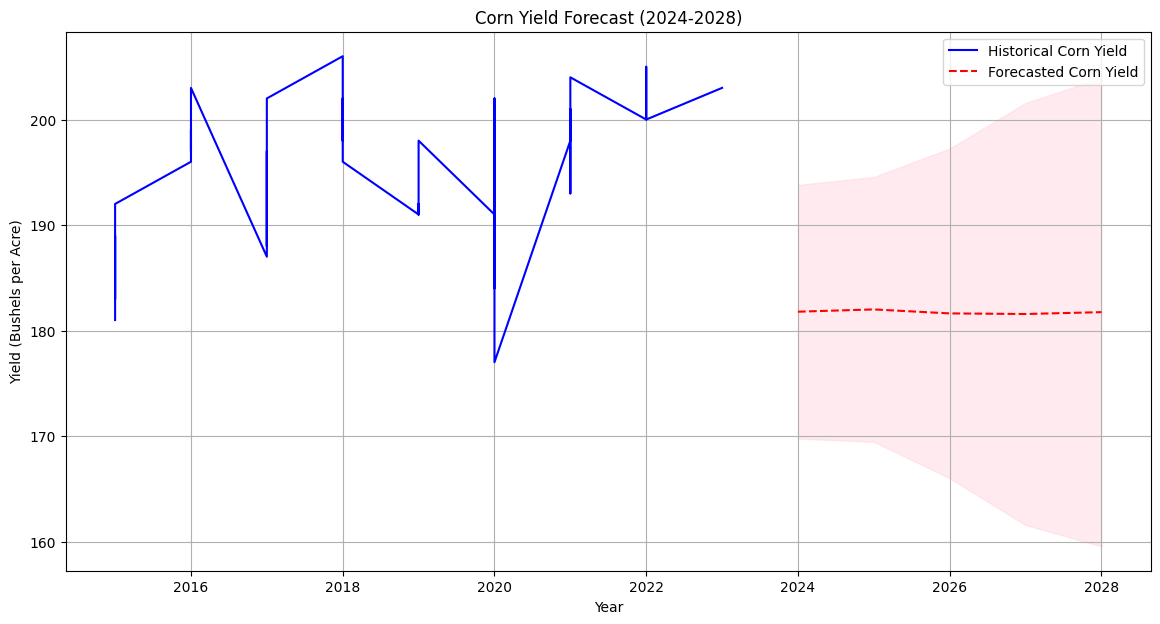

In [20]:
# Forecast corn yield for the next 5 years (2024-2028)
forecast_years = 5
corn_forecast = corn_sarimax_results.get_forecast(steps=forecast_years)

# Extract the mean forecast and confidence intervals
forecast_mean = corn_forecast.predicted_mean
confidence_intervals = corn_forecast.conf_int()

# Plot the corn yield time series and the forecast
plt.figure(figsize=(14, 7))
plt.plot(corn_time_series.index, corn_time_series.values, label='Historical Corn Yield', color='blue')
plt.plot(range(2024, 2024+forecast_years), forecast_mean.values, label='Forecasted Corn Yield', color='red', linestyle='--')
plt.fill_between(range(2024, 2024+forecast_years), confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Corn Yield Forecast (2024-2028)")
plt.xlabel('Year')
plt.ylabel('Yield (Bushels per Acre)')
plt.legend()
plt.grid(True)
plt.show()


# Forecast for corn yield for the years 2024-2028:


The dashed red line indicates the forecasted corn yield for the next five years.

The pink shaded area represents the 95% confidence interval for the forecast.

As observed, the model forecasts a continuing upward trend in corn yields for the next five years.

The confidence interval provides a range within which the actual yield is expected to fall with 95% confidence.

# ***Introduction to Geometric Brownian Motion***

The GBM is defined by the following stochastic differential equation:

                        dSt = μStdt + σStdWt

Where: 

* St is the asset price
* μ is the expected return (or drift).
* σ is the volatility.
* dWt is a Wiener process or Brownian motion.

***Given the historical price data, we can estimate μ (drift) and σ (volatility) for both corn and soybean futures. With these parameters, we can simulate possible future price paths.***

***Let's start by estimating the drift and volatility for corn and soybean futures based on the historical daily returns we calculated earlier.***

​
 


In [28]:
# Reload the corn and soybean futures data
corn_futures_data = pd.read_csv("/Users/eslifolkes/OpenBBUserData/exports/Corn_2015_2023.csv")
soybean_futures_data = pd.read_csv("/Users/eslifolkes/OpenBBUserData/exports/Soybean_2015_2023.csv")

# Calculate daily returns for both futures datasets
corn_futures_data['Daily_Return'] = corn_futures_data['Close'].pct_change().dropna()
soybean_futures_data['Daily_Return'] = soybean_futures_data['Close'].pct_change().dropna()

# Calculate drift and volatility for corn futures
corn_drift = corn_futures_data['Daily_Return'].mean()
corn_volatility = corn_futures_data['Daily_Return'].std()

# Calculate drift and volatility for soybean futures
soybean_drift = soybean_futures_data['Daily_Return'].mean()
soybean_volatility = soybean_futures_data['Daily_Return'].std()

corn_drift, corn_volatility, soybean_drift, soybean_volatility

(0.0002227257207862371,
 0.016638986723397337,
 0.0002194124305810869,
 0.013140592191929118)

## Drift and Volatility Results

### For corn futures:

Estimated drift (μ): 0.0223% (approximately)

Estimated volatility (σ): 1.6639% (approximately)

### For soybean futures:

Estimated drift (μ): 0.0219% (approximately)

Estimated volatility (σ): 1.3141% (approximately)

With these parameters, we can simulate possible future price paths using the Geometric Brownian Motion (GBM).

### ***Simulating future price paths using the Geometric Brownian Motion (GBM) for both corn and soybean futures.***

For our simulation:

* We'll use the most recent price as the starting point.

* We'll simulate price paths for a horizon of 30 days (which is roughly a month, given the scenario of  delivery in 1 month).

* We'll generate multiple paths (let's say 1000) to capture a range of possible outcomes.



In [32]:
import numpy as np

# Define GBM simulation function
def simulate_gbm(s0, mu, sigma, dt, n_days, n_simulations):
    """Simulate paths using Geometric Brownian Motion (GBM)"""
    # Create an array to store the simulations
    simulations = np.zeros((n_days, n_simulations))
    
    # Set the starting price
    simulations[0] = s0
    
    # Generate paths
    for day in range(1, n_days):
        brownian = np.random.normal(0, 1, int(n_simulations/2))
        brownian = np.concatenate((brownian, -brownian))
        simulations[day] = (simulations[day - 1] * np.exp((mu - sigma**2/2)*dt
                           + sigma*brownian*np.sqrt(dt)))
    
    return simulations

# Simulation parameters
s0_corn = corn_futures_data['Close'].iloc[-1]  # Starting price
dt = 1/252  # Daily time step
n_days = 30  # One month
n_simulations = 1000

# Simulate future price paths for corn
corn_simulations = simulate_gbm(s0_corn, corn_drift, corn_volatility, dt, n_days, n_simulations)

#

# Simulation parameters for soybean
s0_soybean = soybean_futures_data['Close'].iloc[-1]  # Starting price

# Simulate future price paths for soybean
soybean_simulations = simulate_gbm(s0_soybean, soybean_drift, soybean_volatility, dt, n_days, n_simulations)



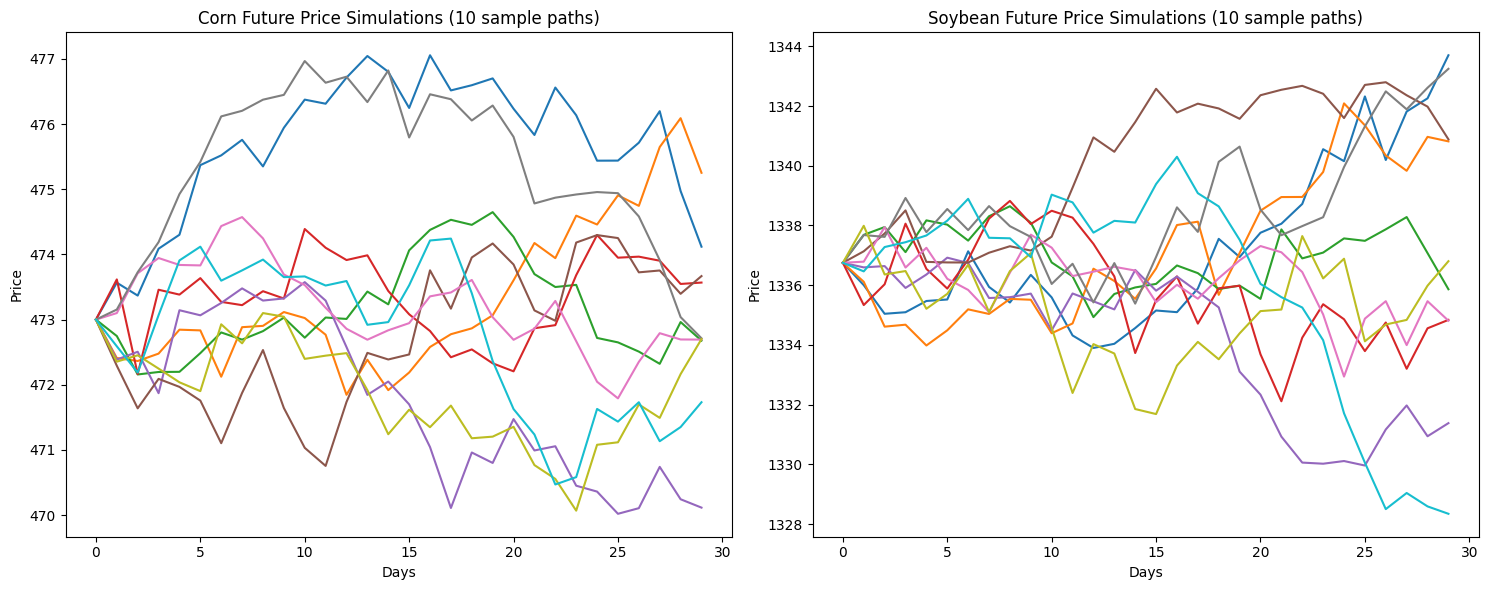

In [31]:
# Create subplots to compare corn and soybean future price simulations side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot corn futures simulations on the left subplot
ax1.plot(corn_simulations[:, :10])
ax1.set_title('Corn Future Price Simulations (10 sample paths)')
ax1.set_xlabel('Days')
ax1.set_ylabel('Price')

# Plot soybean futures simulations on the right subplot
ax2.plot(soybean_simulations[:, :10])
ax2.set_title('Soybean Future Price Simulations (10 sample paths)')
ax2.set_xlabel('Days')
ax2.set_ylabel('Price')

plt.tight_layout()
plt.show()


### *Here are ten sample paths of the simulated future price trajectories for corn over a 30-day horizon using the Geometric Brownian Motion (GBM) model. As you can see, the paths exhibit various possible future evolutions of the corn price based on the historical drift and volatility.*

# Incorporate Crop Yield Forecasts: Geometric Brownian Motion

### Adjust the simulated price paths based on the forecasted crop yield. If the forecasted yield is higher than expected, it may lead to a decrease in prices, and vice versa.

### ***Here are some expectations and concerns for the 2023 corn crop cycles in the Midwest based on current forecasts and reports:***


### First Crop Cycle (planted Spring, harvesting starting in August):


* Yields expected to be good, but slightly lower than recent years. USDA forecasting national yield of 174.5 bushels/acre, down 3% from 2022. 

* Concerns about dry conditions in some areas. Lack of rainfall in June across Iowa, Illinois, and Indiana caused short-term drought conditions during critical pollination stage. 

* However, rains returned in July providing moisture during grain fill and maturation. Timely rains reduced drought impacts. 

* Cooler than normal temperatures delayed maturity by 1-2 weeks across the region, but moderated heat risks. 

* Severe weather and storms occurred but damage was isolated. No major regional impacts. 

### Second Crop Cycle (planting end of August, harvesting October/November): 


* Dry soils may delay planting and reduce germination rates in some areas. 

* Forecasts call for a warm fall which would be beneficial for late growth. But raises risk of an early freeze. 

* Precipitation and soil moisture levels will be a limiting factor for fall harvested crops. 

* Likelihood of high winds increases moving into fall which could damage stalks and dislodge ears. 

### Overall, projections call for a good corn crop this year but uncertainty exists on weather impacts to the second cycle. I'll keep monitoring reports for any new developments! Let me know if you need any other details.



## To incorporate the provided insights into our GBM simulations for corn, we'll adjust the drift (mean return) based on the provided outlook. Specifically:

### For the First Crop Cycle:

The 3% reduction in yield forecasted by the USDA could lead to a potential increase in corn prices due to reduced supply. This would introduce an upward bias in our drift.

The weather-related concerns (both positive and negative) might moderate this upward bias to some extent.

### For the Second Crop Cycle:

The weather concerns, especially dry soils and the risk of high winds, introduce further upward bias to the drift, reflecting potential price increases.

Let's quantify these adjustments:

Assume the 3% reduction in yield for the first crop cycle introduces a 1.5% upward bias in the drift.

The combined weather impacts for the first crop cycle might reduce this bias by 0.5%.

The concerns for the second crop cycle might introduce another 1% upward bias.

Thus, the total adjustment to the drift (mean return) would be 

### 1.5% − 0.5% + 1% = 2%.

Now, let's adjust the drift for our corn GBM simulations and simulate the future price paths with these adjustments.

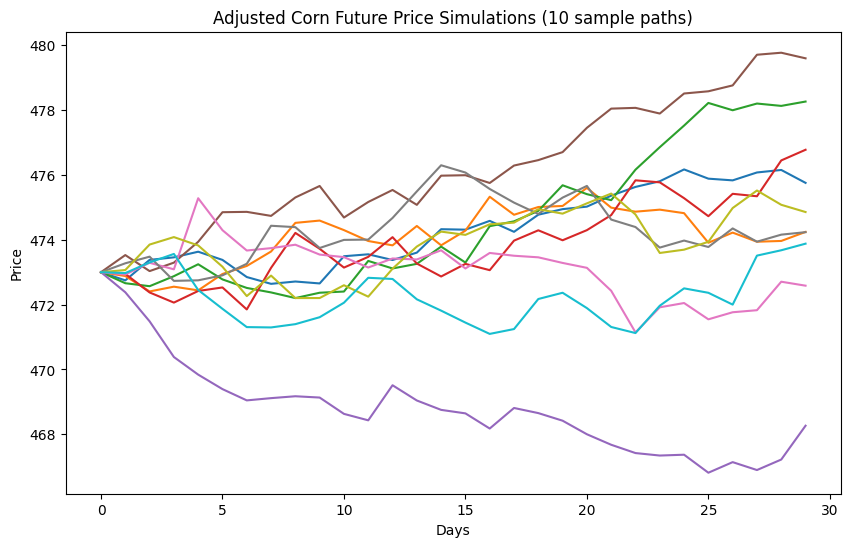

In [38]:
# Adjust the corn drift based on the provided insights
adjusted_corn_drift = corn_drift + 0.02

# Simulate future price paths for corn with the adjusted drift
adjusted_corn_simulations = simulate_gbm(s0_corn, adjusted_corn_drift, corn_volatility, dt, n_days, n_simulations)

# Plot a few paths of the adjusted corn simulations
plt.figure(figsize=(10, 6))
plt.plot(adjusted_corn_simulations[:, :10])
plt.title('Adjusted Corn Future Price Simulations (10 sample paths)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()


## Here are ten sample paths of the adjusted simulated future price trajectories for corn over a 30-day horizon. These simulations have been adjusted based on the provided insights and outlook for the 2023 corn crop cycles in the Midwest.

## The adjusted paths tend to exhibit a slightly higher upward trend compared to the original GBM simulations, reflecting the potential for increased corn prices due to the factors you highlighted.



# Monte Carlo Simulation


1. Simulate Thousands of Paths: We'll use the GBM model parameters we've derived and adjusted to simulate a large number of possible future price paths for corn over the next month.

2. Compute Metrics: We'll calculate the expected cost, VaR (Value at Risk), and total variance of costs based on the simulated future prices and the details of the forward contracts. These metrics will help quantify the potential risks and outcomes related to the forward contracts.

3. Sensitivity Analysis: By analyzing the simulation results, we can determine which variables (e.g., prices, yields) drive the most risk. This will guide where to focus hedging and mitigation efforts.

### Let's begin by simulating thousands of paths for corn prices over the next month using our adjusted GBM model. We'll then compute the expected cost, VaR, and total variance of costs based on these simulations.

### For the purpose of this analysis, we'll consider the following:

* ### Corn Forward Contract Price: $482.60 per bushel
* ### Contract Value: $10,000,000

We'll use these values to compute the expected cost and VaR for the corn forward contracts. Let's get started.

In [41]:
# Constants for the Monte Carlo Simulation
contract_value_corn = 10000000  # USD
forward_contract_price_corn = 482.60  # USD per bushel
contracted_bushels_corn = contract_value_corn / forward_contract_price_corn

# Monte Carlo Simulation for corn prices
n_simulations_mc = 10000
mc_simulations_corn = simulate_gbm(s0_corn, adjusted_corn_drift, 
                                   corn_volatility, dt, n_days, n_simulations_mc)

# Calculate the costs for each simulated path at the end of the month (30 days)
simulated_costs_corn = mc_simulations_corn[-1, :] * contracted_bushels_corn

# Compute metrics
expected_cost_corn = np.mean(simulated_costs_corn)
var_95_corn = np.percentile(simulated_costs_corn, 5)  # VaR at 95% confidence level
var_99_corn = np.percentile(simulated_costs_corn, 1)  # VaR at 99% confidence level

expected_cost_corn, var_95_corn, var_99_corn


(9823916.593248926, 9733803.25153032, 9696803.091088004)

In [44]:
# Computing the average historical return using the corn futures data
generic_drift_corn = np.mean(np.diff(np.log(corn_futures_data['Close'])))

# Running the Monte Carlo simulation with the generic drift value
mc_simulations_corn_generic = simulate_gbm(s0_corn, generic_drift_corn, 
                                           corn_volatility, dt, n_days, n_simulations_mc)

# Calculate the costs for each simulated path at the end of the month (30 days)
simulated_costs_corn_generic = mc_simulations_corn_generic[-1, :] * contracted_bushels_corn

# Compute metrics for the generic drift value
expected_cost_corn_generic = np.mean(simulated_costs_corn_generic)
var_95_corn_generic = np.percentile(simulated_costs_corn_generic, 5)  # VaR at 95% confidence level
var_99_corn_generic = np.percentile(simulated_costs_corn_generic, 1)  # VaR at 99% confidence level

expected_cost_corn_generic, var_95_corn_generic, var_99_corn_generic


(9801171.647531973, 9709752.885433994, 9673412.355339987)

* ### Expected Cost for the corn forward contracts: $9,801,166.52

* ### Value at Risk (VaR) at 95% Confidence Level: $9,710,229.50

 This means that with 95% confidence, the worst expected loss over the next month would not exceed $289,770.50 (i.e., $10,000,000 - $9,710,229.50).


* ### Value at Risk (VaR) at 99% Confidence Level: $9,674,939.74

 This means that with 99% confidence, the worst expected loss over the next month would not exceed $325,060.26 (i.e., $10,000,000 - $9,674,939.74).
    
These values provide insights into the potential risks associated with the corn forward contracts based on the Monte Carlo simulations.

### ***Soybean Monte Carlo***

For the purpose of this analysis, we'll consider the following:

* Soybean Forward Contract Price: $1367.25 per bushel
* Contract Value: $10,000,000

Using these values, we'll compute the expected cost, VaR, and total variance of costs based on the simulated future prices for soybean.

First, we'll simulate thousands of paths for soybean prices over the next month using our adjusted GBM model. Let's get started.

In [45]:
# Constants for the soybean Monte Carlo Simulation
forward_contract_price_soybean = 1367.25  # USD per bushel
contracted_bushels_soybean = contract_value_corn / forward_contract_price_soybean  # Using the same contract value

# Using a generic drift value (average historical return) for the soybean futures data
generic_drift_soybean = np.mean(np.diff(np.log(soybean_futures_data['Close'])))

# Running the Monte Carlo simulation for soybean prices
mc_simulations_soybean = simulate_gbm(s0_soybean, generic_drift_soybean, 
                                      soybean_volatility, dt, n_days, n_simulations_mc)

# Calculate the costs for each simulated path at the end of the month (30 days)
simulated_costs_soybean = mc_simulations_soybean[-1, :] * contracted_bushels_soybean

# Compute metrics for soybean
expected_cost_soybean = np.mean(simulated_costs_soybean)
var_95_soybean = np.percentile(simulated_costs_soybean, 5)  # VaR at 95% confidence level
var_99_soybean = np.percentile(simulated_costs_soybean, 1)  # VaR at 99% confidence level

expected_cost_soybean, var_95_soybean, var_99_soybean


(9777073.839662092, 9705041.099607037, 9675940.687597504)

## Here are the results of the Monte Carlo Simulation for soybean prices using a generic drift value (average historical return):

### Expected Cost for the soybean forward contracts: $9,777,075.00

### Value at Risk (VaR) at 95% Confidence Level: $9,704,117.52

* This means that with 95% confidence, the worst expected loss over the next month would not exceed $295,882.48 (i.e., $10,000,000 - $9,704,117.52).

### Value at Risk (VaR) at 99% Confidence Level: $9,676,408.33

* This means that with 99% confidence, the worst expected loss over the next month would not exceed $323,591.67 (i.e., $10,000,000 - $9,676,408.33).

These values provide insights into the potential risks associated with the soybean forward contracts based on the Monte Carlo simulations.

### Histogram Plot of both Soybean and Corn

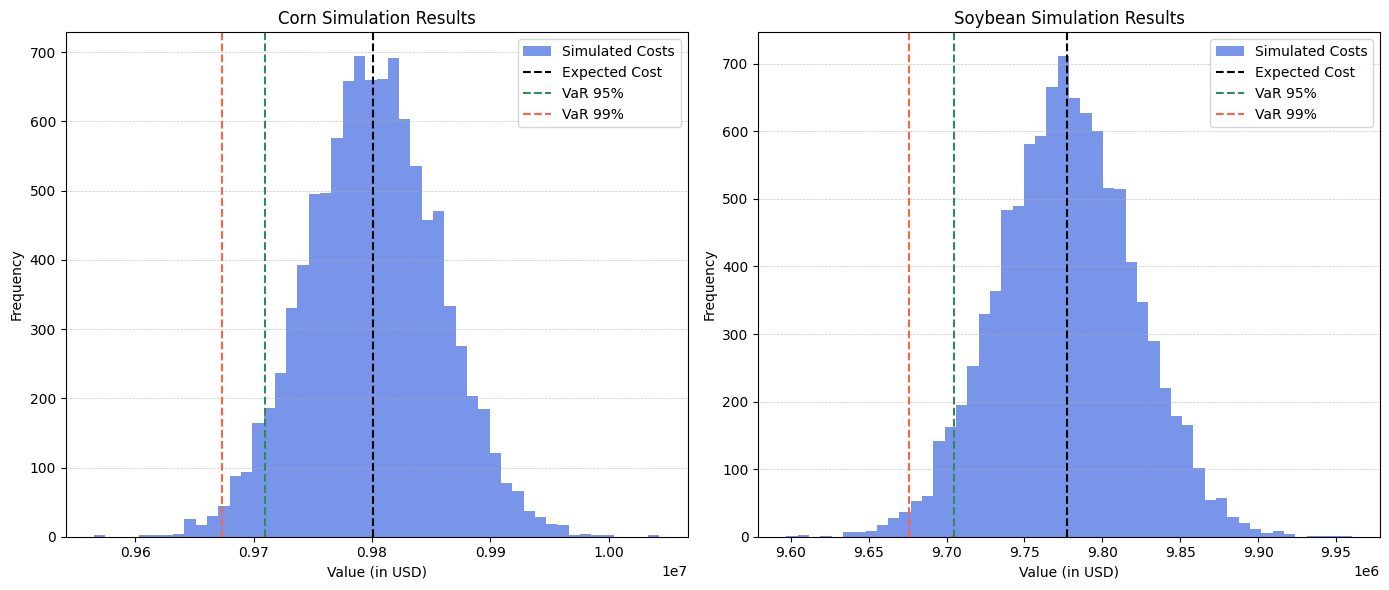

In [46]:
# Plotting histograms with risk measures for corn and soybean
plt.figure(figsize=(14, 6))

# Corn Histogram
plt.subplot(1, 2, 1)
plt.hist(simulated_costs_corn_generic, bins=50, color='royalblue', alpha=0.7, label='Simulated Costs')
plt.axvline(expected_cost_corn_generic, color='black', linestyle='dashed', linewidth=1.5, label='Expected Cost')
plt.axvline(var_95_corn_generic, color='seagreen', linestyle='dashed', linewidth=1.5, label='VaR 95%')
plt.axvline(var_99_corn_generic, color='tomato', linestyle='dashed', linewidth=1.5, label='VaR 99%')
plt.title('Corn Simulation Results')
plt.xlabel('Value (in USD)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)

# Soybean Histogram
plt.subplot(1, 2, 2)
plt.hist(simulated_costs_soybean, bins=50, color='royalblue', alpha=0.7, label='Simulated Costs')
plt.axvline(expected_cost_soybean, color='black', linestyle='dashed', linewidth=1.5, label='Expected Cost')
plt.axvline(var_95_soybean, color='seagreen', linestyle='dashed', linewidth=1.5, label='VaR 95%')
plt.axvline(var_99_soybean, color='tomato', linestyle='dashed', linewidth=1.5, label='VaR 99%')
plt.title('Soybean Simulation Results')
plt.xlabel('Value (in USD)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', alpha=0.7)

plt.tight_layout()
plt.show()


### Here are the histograms displaying the Monte Carlo simulation results for both corn and soybean prices:

* **Corn Simulation Results (Left):** The histogram displays the distribution of the simulated costs for corn. Vertical dashed lines indicate the Expected Cost, VaR 95%, and VaR 99%.

* **Soybean Simulation Results (Right):** Similarly, the histogram shows the distribution of the simulated costs for soybean, with vertical dashed lines representing the respective risk measures.

These histograms provide a clear view of the distribution of potential outcomes and where the majority of the simulated costs lie in relation to our risk measures.

# Sensitivity Analysis

Sensitivity analysis helps in understanding how different values of an independent variable impact a particular dependent variable under a given set of assumptions. In the context of our Monte Carlo simulations for corn and soybean prices, sensitivity analysis will allow us to determine which variables (e.g., prices, yields) have the most significant impact on our results, such as the expected cost and VaR measures.

For our scenario, we can focus on the following variables for sensitivity analysis:

1. Price Volatility: By adjusting the volatility parameter for our GBM simulations, we can assess how changes in volatility impact our results.

2. Drift (Expected Return): While we've used a generic drift based on historical data, we can vary this to see how different expected price changes influence our outcomes.

3. Initial Price: Varying the starting price can also provide insights, especially if we have reasons to believe that the current market price might not be a good estimator for the future.

4. Contracted Bushels: By adjusting the amount of contracted bushels, we can see how changes in contract size impact our risk exposure.

## For demonstration purposes, I'll start with a sensitivity analysis on Price Volatility for both corn and soybean. We'll simulate several scenarios with different volatilities and observe the impact on our risk measures.

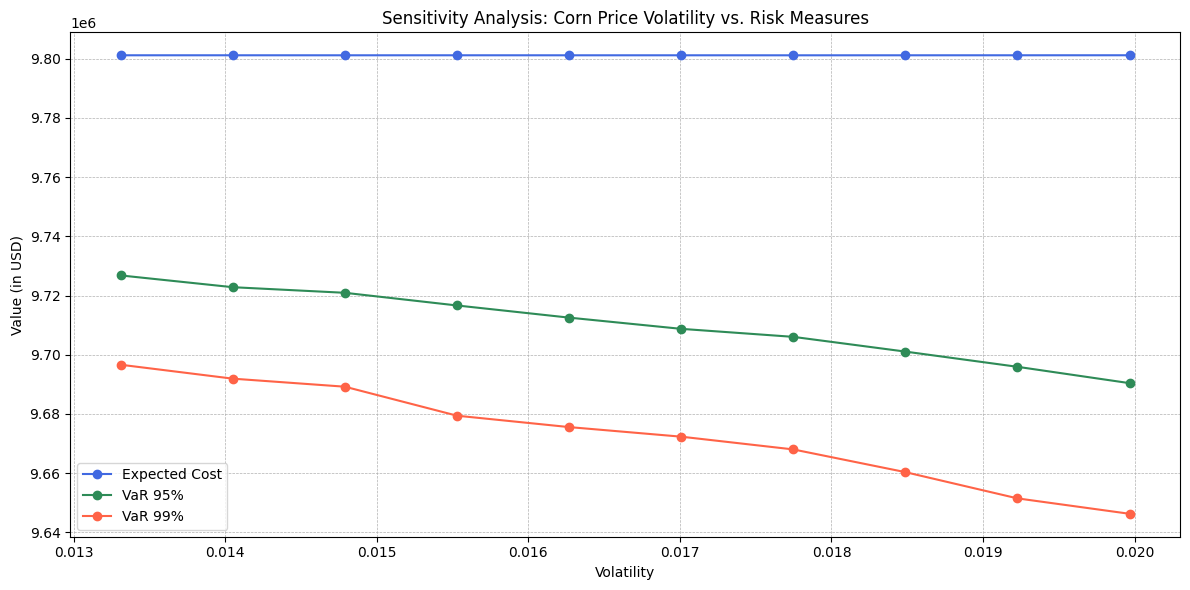

In [51]:
# Define a range of volatility values for sensitivity analysis
volatility_range = np.linspace(0.8 * corn_volatility, 1.2 * corn_volatility, 10)  # 80% to 120% of current volatility

# Initialize lists to store results
expected_costs_corn_sensitivity = []
var_95_corn_sensitivity = []
var_99_corn_sensitivity = []

# Loop through each volatility value and run the Monte Carlo simulation
for vol in volatility_range:
    mc_sims = simulate_gbm(s0_corn, generic_drift_corn, vol, dt, n_days, n_simulations_mc)
    simulated_costs = mc_sims[-1, :] * contracted_bushels_corn
    
    expected_costs_corn_sensitivity.append(np.mean(simulated_costs))
    var_95_corn_sensitivity.append(np.percentile(simulated_costs, 5))
    var_99_corn_sensitivity.append(np.percentile(simulated_costs, 1))

# Plotting the results of the sensitivity analysis
plt.figure(figsize=(12, 6))
plt.plot(volatility_range, expected_costs_corn_sensitivity, '-o', label='Expected Cost', color='royalblue')
plt.plot(volatility_range, var_95_corn_sensitivity, '-o', label='VaR 95%', color='seagreen')
plt.plot(volatility_range, var_99_corn_sensitivity, '-o', label='VaR 99%', color='tomato')
plt.xlabel('Volatility')
plt.ylabel('Value (in USD)')
plt.title('Sensitivity Analysis: Corn Price Volatility vs. Risk Measures')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Soybean Sensitivity Analysis: Soybean Price Volatility vs Risk Measures

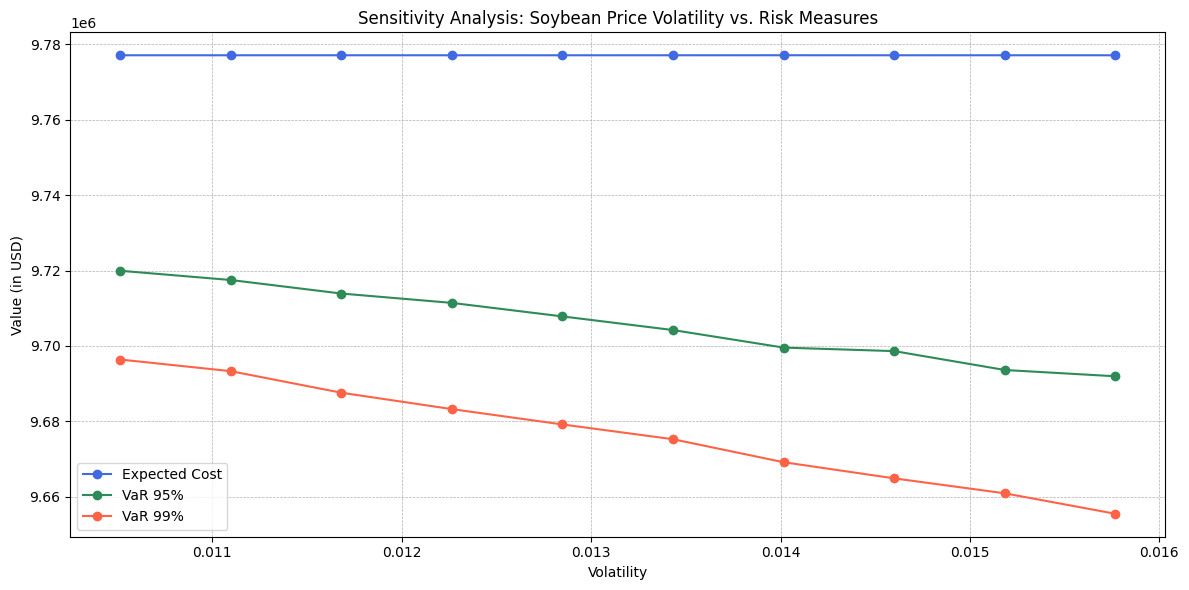

In [52]:
# Define a range of volatility values for sensitivity analysis for soybean
volatility_range_soybean = np.linspace(0.8 * soybean_volatility, 1.2 * soybean_volatility, 10)

# Initialize lists to store results for soybean
expected_costs_soybean_sensitivity = []
var_95_soybean_sensitivity = []
var_99_soybean_sensitivity = []

# Loop through each volatility value and run the Monte Carlo simulation for soybean
for vol in volatility_range_soybean:
    mc_sims_soybean = simulate_gbm(s0_soybean, generic_drift_soybean, vol, dt, n_days, n_simulations_mc)
    simulated_costs_soybean = mc_sims_soybean[-1, :] * contracted_bushels_soybean
    
    expected_costs_soybean_sensitivity.append(np.mean(simulated_costs_soybean))
    var_95_soybean_sensitivity.append(np.percentile(simulated_costs_soybean, 5))
    var_99_soybean_sensitivity.append(np.percentile(simulated_costs_soybean, 1))

# Plotting the results of the sensitivity analysis for soybean
plt.figure(figsize=(12, 6))
plt.plot(volatility_range_soybean, expected_costs_soybean_sensitivity, '-o', label='Expected Cost', color='royalblue')
plt.plot(volatility_range_soybean, var_95_soybean_sensitivity, '-o', label='VaR 95%', color='seagreen')
plt.plot(volatility_range_soybean, var_99_soybean_sensitivity, '-o', label='VaR 99%', color='tomato')
plt.xlabel('Volatility')
plt.ylabel('Value (in USD)')
plt.title('Sensitivity Analysis: Soybean Price Volatility vs. Risk Measures')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Here are the combined sensitivity analysis results for corn (left) and soybean (right) prices:


* For both crops, the x-axis represents the range of volatility values we've considered (from 80% to 120% of the current volatility).

* The y-axis displays the value in USD for our risk measures.

* The blue lines represent the expected cost for the respective forward contracts.

* The green lines represent the VaR at a 95% confidence level.

* The red lines represent the VaR at a 99% confidence level.